In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import sklearn
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

Tasks

 ● TimeSeries Exploratory Data Analysis

 ● Next day/week/month sales

 ● Specific customer purchasesTasks

In [76]:
data = pd.read_csv(r"D:\unified mentor internship\index.csv")

In [77]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


## Data preprocessing

In [78]:
data.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

There are 89 null values in card column.

In [79]:
data.fillna('Cash Payer',inplace=True)

In [80]:
data.duplicated().sum()

0

In [81]:
data.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

Here date column have object datatype converting to dates datatype.

In [82]:
data['date'] = pd.to_datetime(data['date'])

In [83]:
data['Day'] = data['date'].dt.day_name()
data['Month'] = data['date'].dt.month_name()
data['Year'] = data['date'].dt.year

extracted year,Month_name and day_name

In [84]:
data['Hour'] = data['datetime'].str.split(' ').str[1].str.split(':').str[0].astype(int)

In [85]:
data['Hour'].unique()

array([10, 12, 13, 15, 16, 18, 19, 11, 14, 17,  9,  7, 20,  8, 22, 21])

In [86]:
def get_noon(hour):
    if 5 <= hour <12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17<= hour < 20:
        return 'Evening'
    else:
        return 'Night'

In [87]:
data['Time of Day'] = data['Hour'].apply(get_noon)

Extracted morning,afternoon,evening,night based on time.

In [88]:
data.head()

,date,datetime,cash_type,card,money,coffee_name,Day,Month,Year,Hour,Time of Day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Friday,March,2024,10,Morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024,12,Afternoon
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024,12,Afternoon
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Friday,March,2024,13,Afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Friday,March,2024,13,Afternoon


Removing unwanted columns.

In [89]:
data.drop(columns=['date','datetime','Hour'],inplace=True)

In [90]:
data.head()

,cash_type,card,money,coffee_name,Day,Month,Year,Time of Day
0,card,ANON-0000-0000-0001,38.7,Latte,Friday,March,2024,Morning
1,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024,Afternoon
2,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024,Afternoon
3,card,ANON-0000-0000-0003,28.9,Americano,Friday,March,2024,Afternoon
4,card,ANON-0000-0000-0004,38.7,Latte,Friday,March,2024,Afternoon


In [91]:
data['card'].nunique()

447

There are 447 customers are going to that coffee shop.

## Advanced EDA

### Univariate Analysis

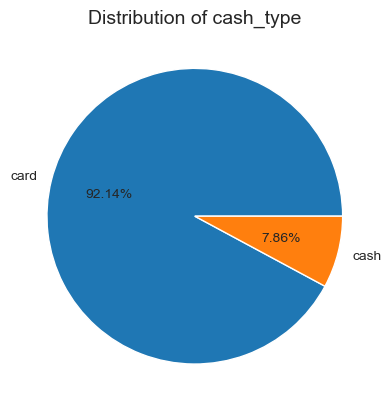

In [92]:
type_ = data['cash_type'].value_counts()
plt.pie(type_.values,labels=type_.index,autopct='%.2f%%')
plt.title('Distribution of cash_type',fontsize=14)
plt.show();

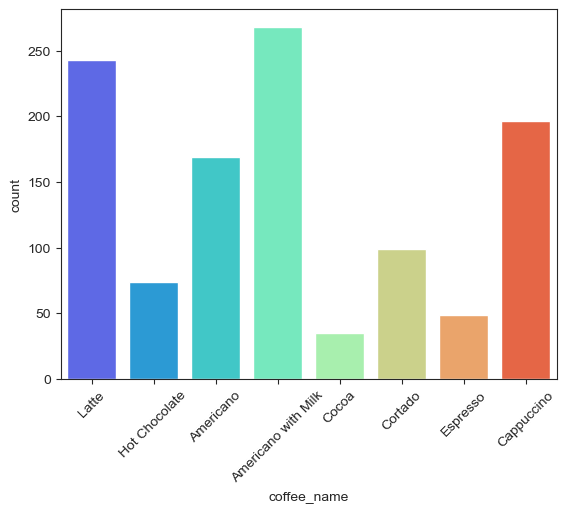

In [93]:
sns.countplot(x=data['coffee_name'],palette='rainbow')
plt.xticks(rotation=45)
plt.show();

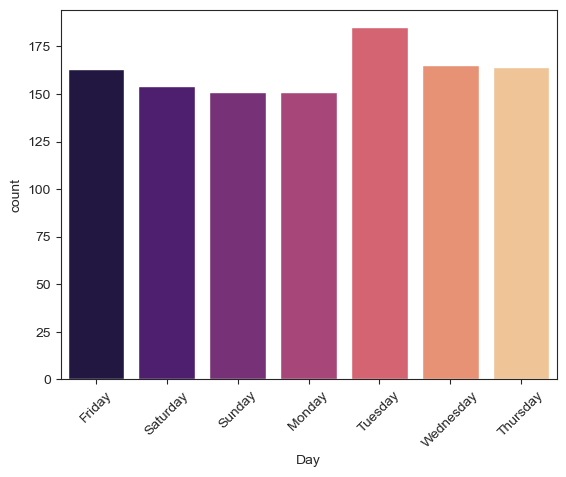

In [94]:
sns.countplot(x=data['Day'],palette='magma')
plt.xticks(rotation=45)
plt.show();

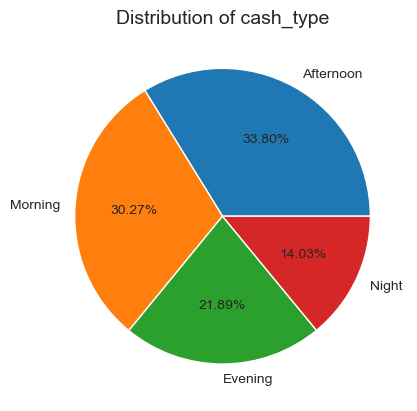

In [95]:
noon = data['Time of Day'].value_counts()
plt.pie(noon.values,labels=noon.index,autopct='%.2f%%')
plt.title('Distribution of cash_type',fontsize=14)
plt.show();

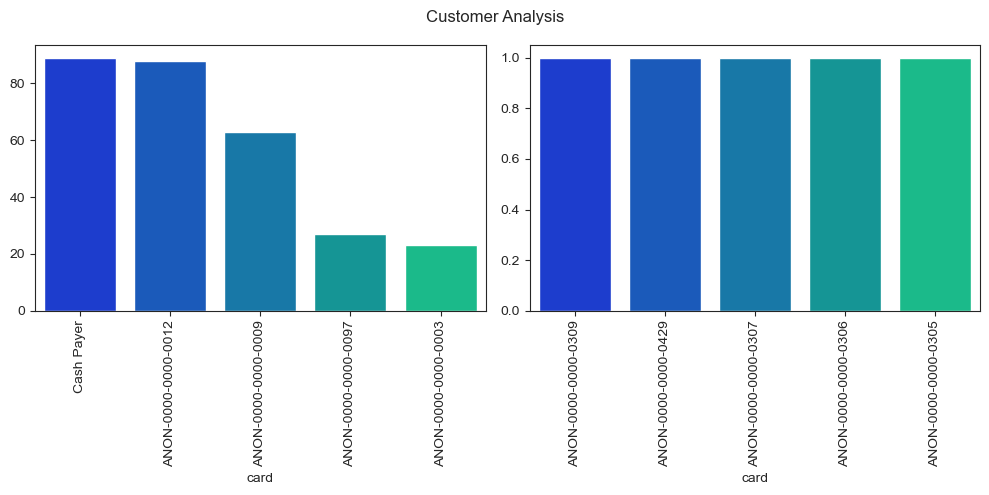

In [103]:
top_custom = data['card'].value_counts().nlargest(5)
bot_custom = data['card'].value_counts().nsmallest(5)

plt.figure(figsize=(10,5))
plt.suptitle('Customer Analysis')
plt.subplot(1,2,1)
sns.barplot(x=top_custom.index,y=top_custom.values,palette='winter',ci=False)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=bot_custom.index,y=bot_custom.values,palette='winter',ci=False)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show();

#### Univariate Analysis: Key Observations

1.The majority of customers preferred card payments over cash.

2.Most individuals chose "Americano with Milk" as their coffee type.

3."Cocoa" was the least selected beverage among all options.

4.Sales peaked on Tuesdays, indicating higher customer activity on that day.

5.The highest number of sales occurred during the morning and afternoon hours.

6.card No-12,9 customers are regular customers.And card No 309 customer is New customer

### Bivariate Analysis

In [60]:
data.head()

,cash_type,card,money,coffee_name,Day,Month,Year,Time of Day
0,card,ANON-0000-0000-0001,38.7,Latte,Friday,March,2024,Morning
1,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024,Afternoon
2,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024,Afternoon
3,card,ANON-0000-0000-0003,28.9,Americano,Friday,March,2024,Afternoon
4,card,ANON-0000-0000-0004,38.7,Latte,Friday,March,2024,Afternoon


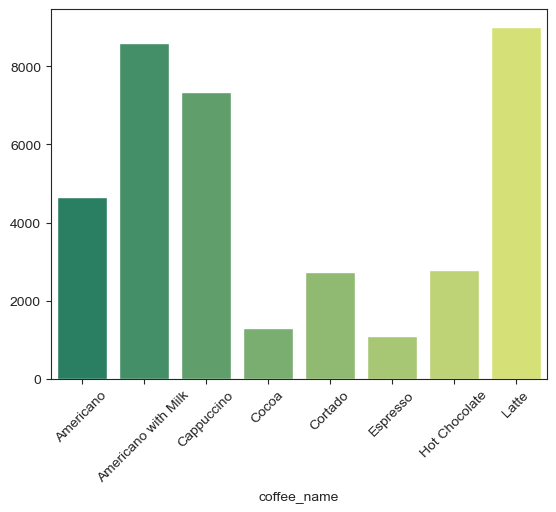

In [61]:
cof = data.groupby(['coffee_name'])['money'].sum()
sns.barplot(x=cof.index,y=cof.values,palette='summer',ci=False)
plt.xticks(rotation=45)
plt.show();

<Axes: xlabel='Month', ylabel='money'>

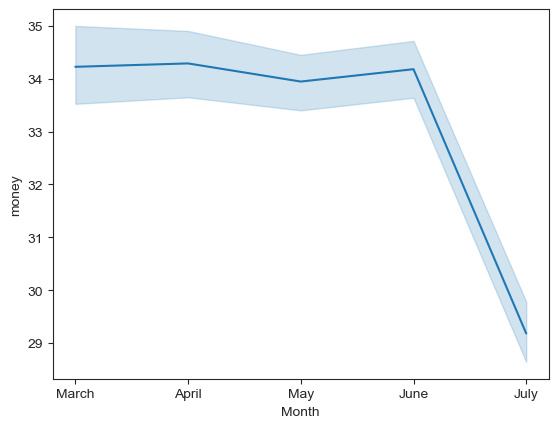

In [62]:
sns.lineplot(x=data['Month'],y=data['money'])

<Axes: xlabel='Time of Day', ylabel='money'>

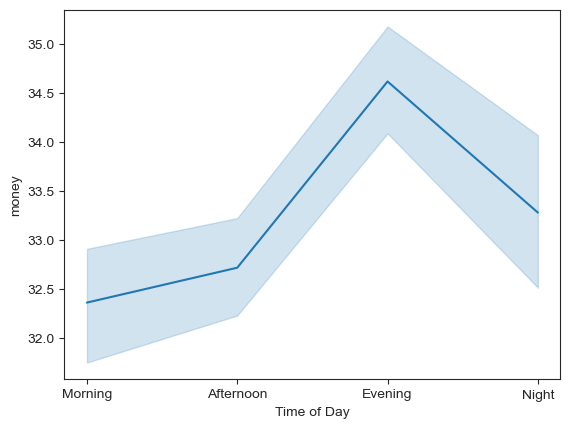

In [63]:
sns.lineplot(x=data['Time of Day'],y=data['money'])

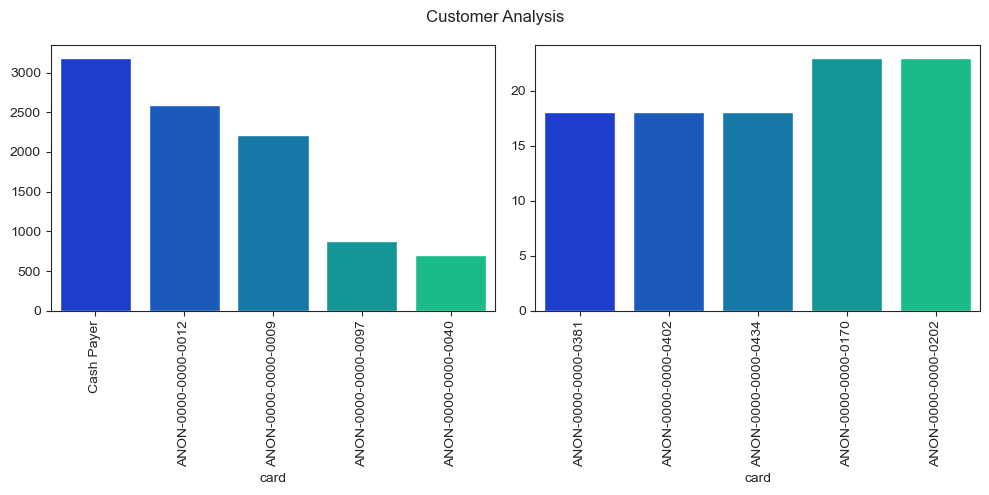

In [104]:
top_custom = data.groupby(['card'])['money'].sum().nlargest(5)
bot_custom = data.groupby(['card'])['money'].sum().nsmallest(5)

plt.figure(figsize=(10,5))
plt.suptitle('Customer Analysis')
plt.subplot(1,2,1)
sns.barplot(x=top_custom.index,y=top_custom.values,palette='winter',ci=False)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=bot_custom.index,y=bot_custom.values,palette='winter',ci=False)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show();

#### Key Observations:

-- Lattee coffee type has earned more money.

-- In the month march the sales are high,And in july sales are down.

-- In the Evening times the sales are high

-- Customer No 12 is the one who make more sales.

### Multivariate Analysis

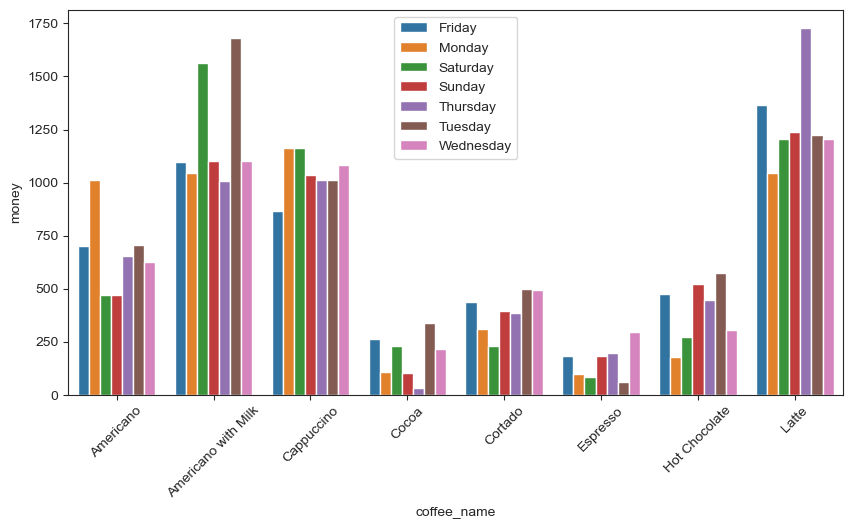

In [64]:
grouped = data.groupby(['coffee_name','Day'])['money'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=grouped,
           x='coffee_name',
           y='money',
           hue='Day')
plt.xticks(rotation=45)
plt.legend();

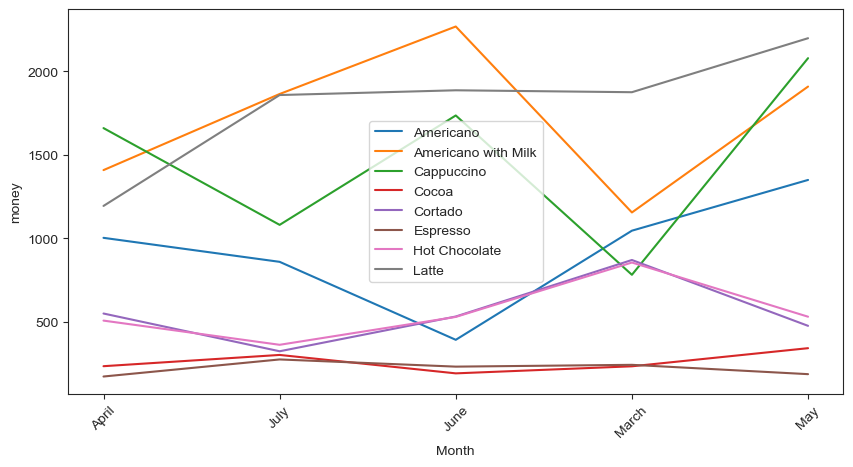

In [65]:
sns.set_style('ticks')
grouped = data.groupby(['coffee_name','Month'])['money'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped,
           x='Month',
           y='money',
           hue='coffee_name')
plt.xticks(rotation=45)
plt.legend();

####  Key observations

-- Lattee is the coffee type raising the sales every weekday.And Espresso is the coffee type with Low Earning.

-- Americano with Milk and acappuccino coffee types sales are down in the month march and in May raised again

## Data Preprocessing

In [66]:
data.columns

Index(['cash_type', 'card', 'money', 'coffee_name', 'Day', 'Month', 'Year',
       'Time of Day'],
      dtype='object')

In [67]:
data.drop(columns= ['card','Year'],inplace=True)

In [68]:
features = data.drop(columns=['money'])
target = data['money']

In [69]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=22)

In [70]:
cat_col = features.columns.tolist()

In [71]:
step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col)
],remainder='passthrough')
step2 = LinearRegression()

pipe = Pipeline([('preprocessing',step1),
                ('model',step2)])

pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['cash_type', 'coffee_name',
                                                   'Day', 'Month',
                                                   'Time of Day'])])),
                ('model', LinearRegression())])

In [72]:
y_pred = pipe.predict(x_test)

In [73]:
r2_score(y_test,y_pred)

0.960063336603389

In [74]:
mean_squared_error(y_test,y_pred)

1.0817111611681702

we build a linear regression model with r2 score 0.96